### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

# Import the kerastuner library
import keras_tuner as kt

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# For optimization remove only 'EIN, keep 'NAME'
#  YOUR CODE GOES HERE
application_df.drop(columns=['EIN'], inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
unique =application_df.nunique()
unique


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_counts =application_df.APPLICATION_TYPE.value_counts()

app_counts
	

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

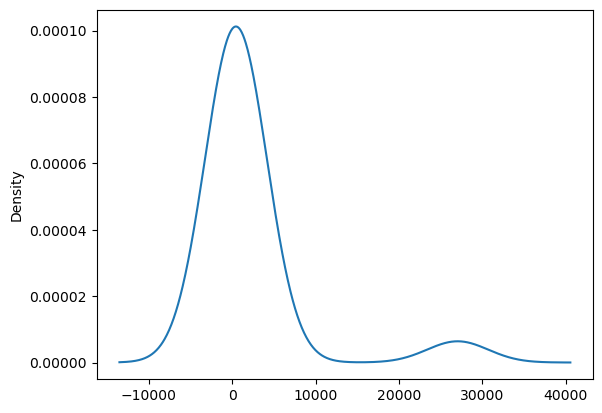

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE

app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(app_counts[app_counts < 500].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classif_counts =application_df.CLASSIFICATION.value_counts()

classif_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

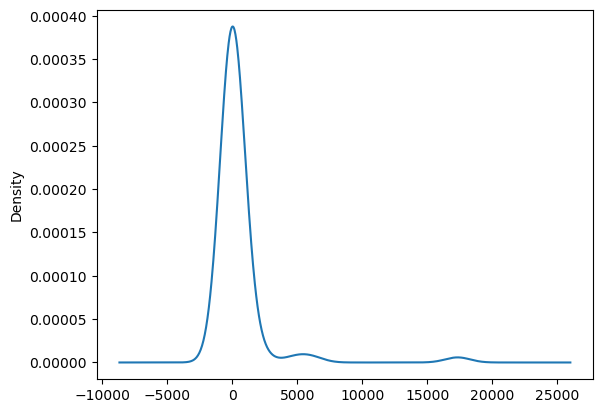

In [8]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classif_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classif_counts[classif_counts < 800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# OPTIMIZATION
# Look at NAME value counts for binning
#  YOUR CODE GOES HERE
name_counts = application_df.NAME.value_counts()

name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [11]:
# ## #OPTIMIZE
# Drop Parent Booster to remove skew
#application_df = application_df.drop(labels = ['NAME'.'PARENT BOOSTER USA INC'], axis=0, inplace=True)
application_df = application_df[application_df['NAME'].str.contains("PARENT BOOSTER USA INC") == False]
application_df = application_df[application_df['NAME'].str.contains("TOPS CLUB INC") == False]
application_df = application_df[application_df['NAME'].str.contains("UNITED STATES BOWLING CONGRESS INC") == False]
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


(-2.0, 20.0)

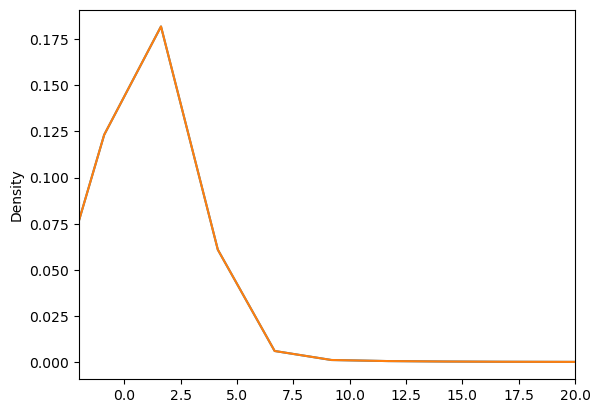

In [12]:
#OPTIMIZATION
# Visualize the value counts of NAME
#  YOUR CODE GOES HERE
name_counts.plot.density()

import matplotlib.pyplot as plt

name_counts.plot.density()
plt.xlim(left=-2, right=20)

In [13]:
# OPTIMIZATION
# Look at NAME value counts for binning
#  YOUR CODE GOES HERE
name_counts = application_df.NAME.value_counts()

name_counts

WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
                                                                       ... 
ST LOUIS SLAM WOMENS FOOTBALL                                             1
AIESEC ALUMNI IBEROAMERICA CORP                                           1
WEALLBLEEDRED ORG INC                                                     1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI      1
WATERHOUSE CHARITABLE TR                                                  1
Name: NAME, Length: 19565, dtype: int64

In [14]:
# # OPTIMIZATION
# # Determine which values to replace if counts are less than ..?
# #  YOUR CODE GOES HERE
# replace_class = list(name_counts[name_counts <1.5].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.NAME = application_df.NAME.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.NAME.value_counts()

In [15]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat])) 

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,NAME_14TH ARMORED DIVISION,NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Verify X_Train
X_train_scaled

array([[ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758],
       [ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758],
       [ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758],
       ...,
       [ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758],
       [ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758],
       [ 0.00679204, -0.04317724, -0.00679204, ..., -0.07737155,
         0.02717758, -0.02717758]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [21]:
# Check number of inputs
len(X_train[0])

19608

In [22]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE  **** Adjust to match starter code *****

# nn_model = tf.keras.models.Sequential()
# #  YOUR CODE GOES HERE
# number_input_features = len(X_train[0])
# hidden_nodes_layer1 = 80
# hidden_nodes_layer2 = 30

# # First hidden layer
# #  YOUR CODE GOES HERE
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# # Second hidden layer
# #  YOUR CODE GOES HERE
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# # Output layer
# #  YOUR CODE GOES HERE
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# # Check the structure of the model
# nn_model.summary()

In [26]:
## OPTIMIZE
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=500,
        max_value=1000,
        step=20), activation=activation, input_dim=len(X_train[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=6,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [27]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [28]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 31 Complete [00h 04m 30s]
val_accuracy: 0.5871039032936096

Best val_accuracy So Far: 0.5871039032936096
Total elapsed time: 02h 48m 09s

Search: Running Trial #32

Value             |Best Value So Far |Hyperparameter
sigmoid           |relu              |activation
820               |530               |first_units
5                 |6                 |num_layers
3                 |3                 |units_0
3                 |5                 |units_1
5                 |1                 |units_2
1                 |1                 |units_3
3                 |3                 |units_4
5                 |3                 |units_5
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
145/678 [=====>........................] - ETA: 1:53 - loss: 0.6995 - accuracy: 0.5808

KeyboardInterrupt: 

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

IndexError: list index out of range

In [ ]:
# # Add Checkpoint / Callback 
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Compile the model
# #  YOUR CODE GOES HERE
# nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# # Configure call back
# cp_callback = ModelCheckpoint(					
#     filepath=checkpoint_path,
#     verbose=1,							
#     save_weights_only=True,		
#     save_freq='epoch',
#     period=5)	 

In [ ]:
# # Train the model
# #  YOUR CODE GOES HERE
# fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100,callbacks=[cp_callback])

In [ ]:
# # Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Save Model  ###   Final name should be:   AlphabetSoupCharity.h5
# nn_model.save("Optimized.h5")